<a href="https://www.kaggle.com/code/sayansh001/energy-efficient-buildings-detailed-eda?scriptVersionId=100653379" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Energy Efficient Buildings Detailed 📊 EDA 📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

![](https://rickardengineering.com/wp-content/uploads/2019/06/RickardEngineeringJune.jpg)

**The competition is organised by `Kaggle` and is in the `WiDS Datathon 2022` series.**


**In this competition, you are supposed to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building..**


<a id="2"></a>
# **<center><span style="color:#00BFC4;">Importing the libraries  </span></center>**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_style("whitegrid")
import os

<a id="2"></a>
# **<center><span style="color:#00BFC4;">Column Description  </span></center>**
- Variable_Name, Describtion,
- "id", "building id",
- "Year_Factor", "anonymized year in which the weather and energy usage factors were observed",
- "State_Factor", "anonymized state in which the building is located",
- "building_class", "building classification",
- "facility_type", "building usage type",
- "floor_area", "floor area (in square feet) of the building",
- "year_built", "year in which the building was constructed",
- "energy_star_rating", "the energy star rating of the building",
- "ELEVATION", "elevation of the building location",
- "january_min_temp", "minimum temperature in January (in Fahrenheit) at the location of the building",
- "january_avg_temp", "average temperature in January (in Fahrenheit) at the location of the building",
- "january_max_temp", "maximum temperature in January (in Fahrenheit) at the location of the building",
- "cooling_degree_days", "cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.",
- "heating_degree_days", "heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.",
- "precipitation_inches", "annual precipitation in inches at the location of the building",
- "snowfall_inches", "annual snowfall in inches at the location of the building",
- "snowdepth_inches", "annual snow depth in inches at the location of the building",
- "avg_temp", "average temperature over a year at the location of the building",
- "days_below_30F", "total number of days below 30 degrees Fahrenheit at the location of the building",
- "days_below_20F", "total number of days below 20 degrees Fahrenheit at the location of the building",
- "days_below_10F", "total number of days below 10 degrees Fahrenheit at the location of the building",
- "days_below_0F", "total number of days below 0 degrees Fahrenheit at the location of the building",
- "days_above_80F", "total number of days above 80 degrees Fahrenheit at the location of the building",
- "days_above_90F", "total number of days above 90 degrees Fahrenheit at the location of the building",
- "days_above_100F", "total number of days above 100 degrees Fahrenheit at the location of the building",
- "days_above_110F", "total number of days above 110 degrees Fahrenheit at the location of the building",
- "direction_max_wind_speed", "wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).",
- "direction_peak_wind_speed", "wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).",
- "max_wind_speed", "maximum wind speed at the location of the building",
- "days_with_fog", "number of days with fog at the location of the building",
- "site_eui", "Target Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills",)




<a id="4"></a>
# **<center><span style="color:#00BFC4;">Data Loading and Preparation </span></center>**

In [2]:
train = pd.read_csv(r"../input/widsdatathon2022/train.csv")
test = pd.read_csv(r"../input/widsdatathon2022/test.csv")
submission = pd.read_csv(r"../input/widsdatathon2022/sample_solution.csv")

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
train.drop(columns=['id'],axis=1,inplace=True)

In [5]:
train.shape

(75757, 63)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>
 
* <i> There are total of <b><u>63</u></b> columns and <b><u>75757</u></b> rows in <b><u>train</u></b> data.</i><br>
* <i> All 62 feature columns have missing values in them with <b><u>days_with_fog </u></b> having highest missing values</i><br>
* <i> <b><u>site_eui</u></b> is the target variable which is only available in the <b><u>train</u></b> dataset.</i><br>
</div>

### <span style="color:#e76f51;"> Quick view of Train Data : </span>

Below are the first 5 rows of train dataset:

In [7]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395


**A brief statistical overview of train dataset**

In [8]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,0.000000,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,0.000000,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,0.000000,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,31.000000,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120


In [9]:
print(f'\033[94mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[94mNumber of values in train data: {train.count().sum()}')
print(f'\033[94mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 75757
Number of columns in train data: 63
Number of values in train data: 4574374
Number missing values in train data: 198317


<a id="4"></a>
# **<center><span style="color:#00BFC4;"> EDA </span></center>**

<AxesSubplot:xlabel='State_Factor', ylabel='count'>

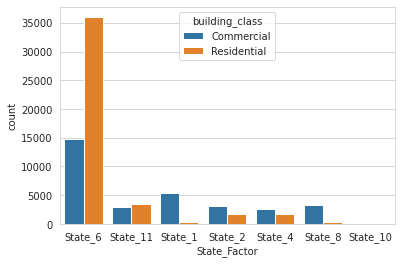

In [10]:
sns.countplot(x='State_Factor',hue='building_class',data=train,order = train['State_Factor'].value_counts().index)

<a id="4.1"></a>
## <span style="color:#e76f51;"> Percentage of data belonging to both Train and Test data  </span> 

<AxesSubplot:ylabel='State_Factor'>

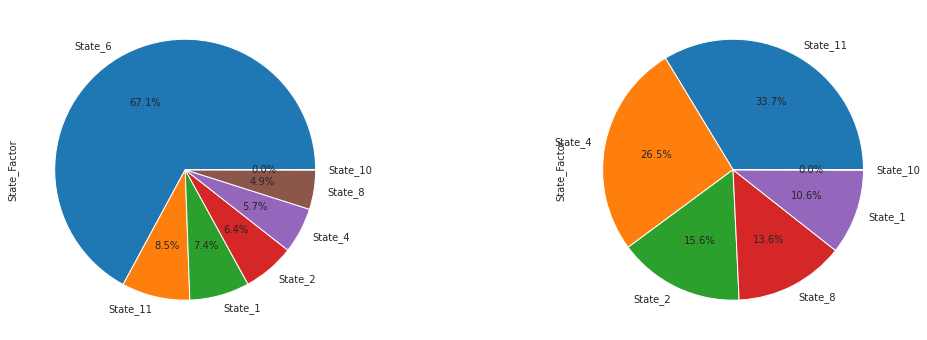

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) 
train['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(1, 2, 2) 
test['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')

We find that State_11 didnt even exist in Train dataset however it exists in Test dataset only

<a id="4.1"></a>
## <span style="color:#e76f51;"> Correlation amongst numerical columns </span> 

<AxesSubplot:>

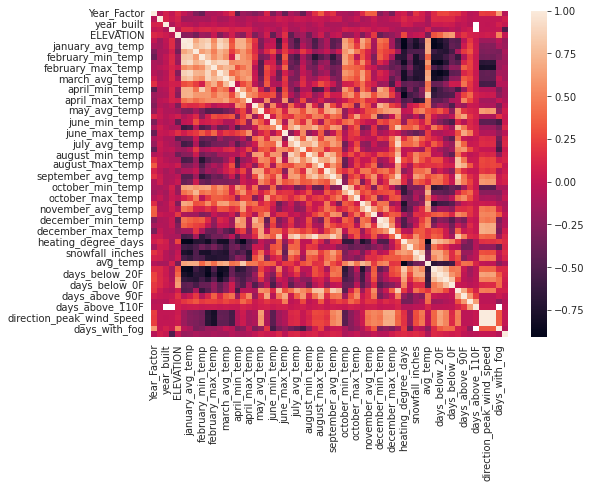

In [12]:
x = train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(x)

<a id="4"></a>
# **<center><span style="color:#00BFC4;">Distribution of Buildings Constructed w.r.t each year </span></center>**

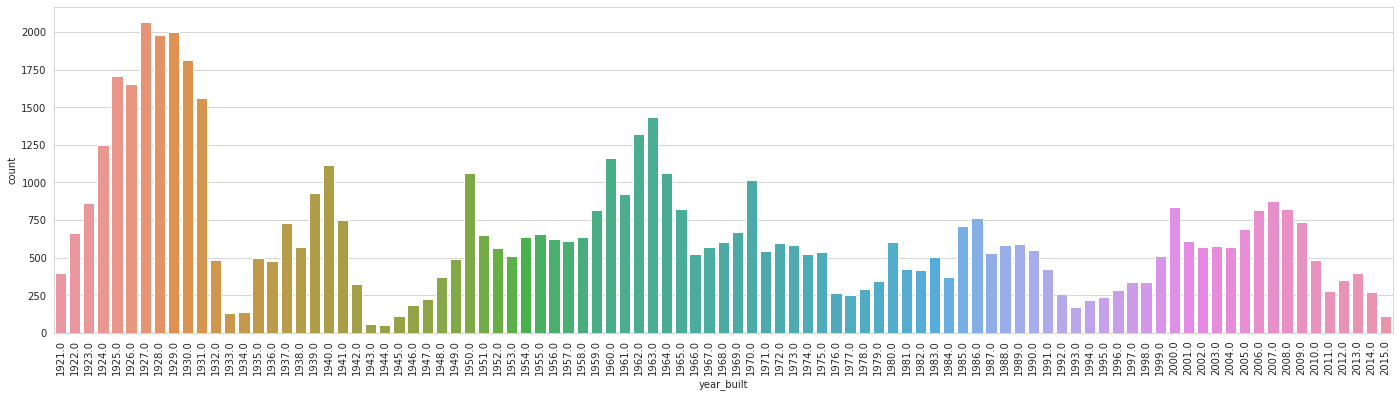

In [13]:
plt.figure(figsize=(24,6))
sns.countplot(x='year_built',data=train[(train.year_built>1920)])
plt.xticks(rotation=90)
plt.show()

## We find that construction of buildings was at an alltime high in 1927, after which it started to shrink. Some of  the reasons which can be attributed are 
- Great Economic Depression 1929 
- in 1940's construction again reduced (https://www.encyclopedia.com/social-sciences/culture-magazines/1940s-business-and-economy-topics-news)

- Recession in 1990's (https://en.wikipedia.org/wiki/Early_1990s_recession#:~:text=Overall%20real%20GDP%20growth%20for,dropping%20to%2010.3%25%20in%201994.)

<a id="4"></a>
# **<center><span style="color:#00BFC4;">Distribution of Top 10 Facilities in Buildings in %</span></center>**

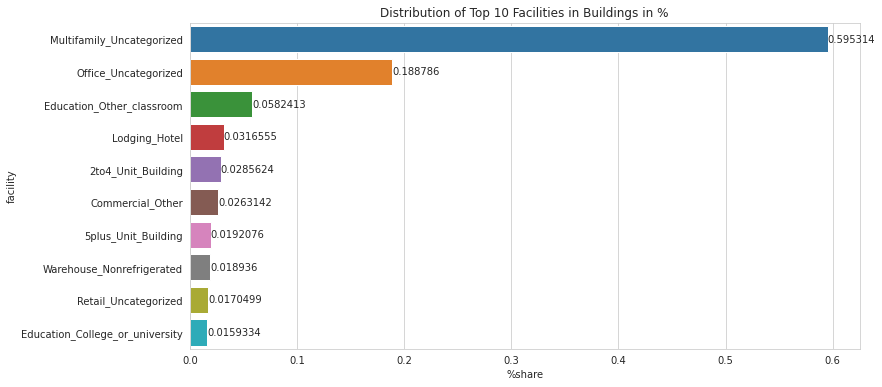

In [14]:
df = pd.DataFrame(train['facility_type'].value_counts().head(10))
df['facility'] = df.index
df.rename(columns = {'facility_type':'count'}, inplace = True)
df['%share'] = df['count']/df['count'].sum()
df.drop(columns=['count'],inplace=True)
df.reset_index(drop=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(y='facility',x='%share',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Distribution of Top 10 Facilities in Buildings in %")
plt.show()

<a id="4"></a>
# **<center><span style="color:#00BFC4;"> Commercial Buildings Characterestics which have a high site_eui</span></center>**

In [15]:
df = pd.DataFrame(train[train['building_class']=='Commercial'][['site_eui','floor_area','year_built','ELEVATION','State_Factor','facility_type']].sort_values(by=['site_eui']).tail(200))
df.dropna()

,site_eui,floor_area,year_built,ELEVATION,State_Factor,facility_type
8615,457.494313,33752.0,1996.0,44.2,State_2,Grocery_store_or_food_market
21901,459.017907,84000.0,1920.0,42.7,State_6,Education_Other_classroom
67877,461.280202,114000.0,1960.0,126.5,State_8,Industrial
28778,462.691411,62157.0,1973.0,15.2,State_6,Education_College_or_university
24899,463.700000,220240.0,1950.0,11.9,State_6,Health_Care_Inpatient
...,...,...,...,...,...,...
9745,962.241793,56433.0,1926.0,3.0,State_2,Office_Uncategorized
6781,970.388586,56433.0,1926.0,213.4,State_2,Office_Uncategorized
28107,975.452321,10000.0,1914.0,15.2,State_6,Parking_Garage
55578,989.887978,63000.0,1930.0,3.4,State_6,Education_College_or_university


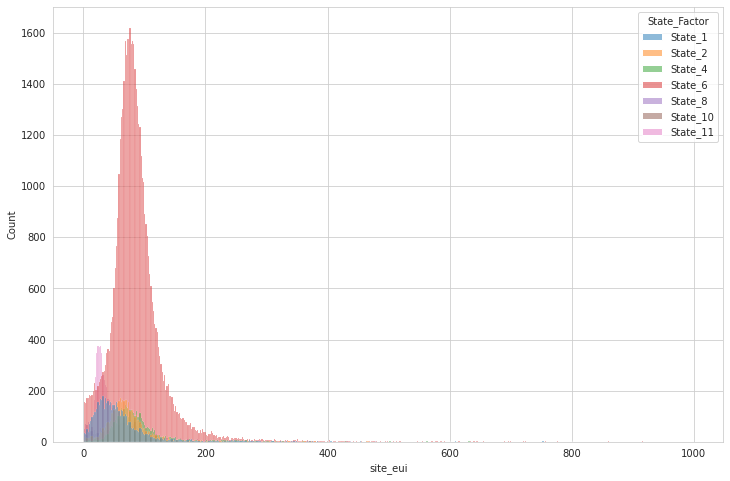

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data = train, x = "site_eui",hue='State_Factor')
plt.show()

In [17]:
len(train[train['building_class']=='Residential'])

43558

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Building Wise Top 10 Distributions</span></center>**

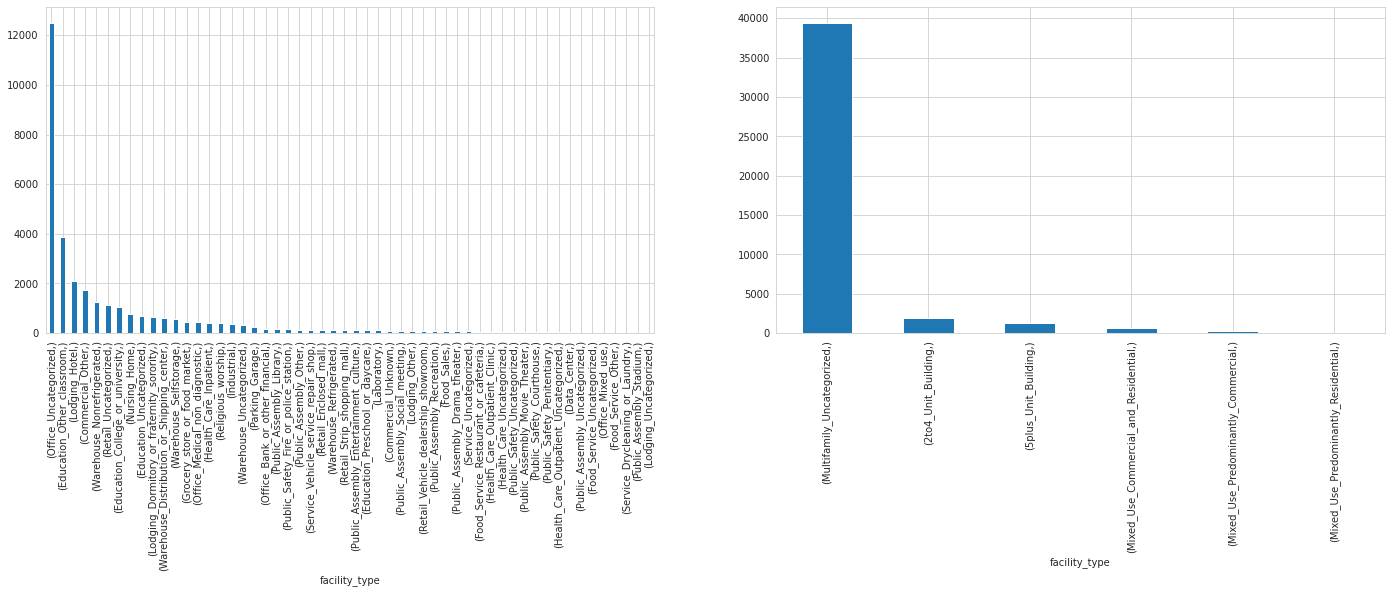

In [18]:
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
train[train['building_class']=='Commercial'][['facility_type']].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
train[train['building_class']=='Residential'][['facility_type']].value_counts().plot(kind='bar')

plt.show()

In [19]:
train[train['building_class']=='Residential'][['facility_type']].value_counts()

facility_type                       
Multifamily_Uncategorized               39455
2to4_Unit_Building                       1893
5plus_Unit_Building                      1273
Mixed_Use_Commercial_and_Residential      672
Mixed_Use_Predominantly_Commercial        256
Mixed_Use_Predominantly_Residential         9
dtype: int64



<a id="3"></a>
# **<center><span style="color:#00BFC4;"> Distribution of Top 100 Site_EUI wrt to States</span></center>**

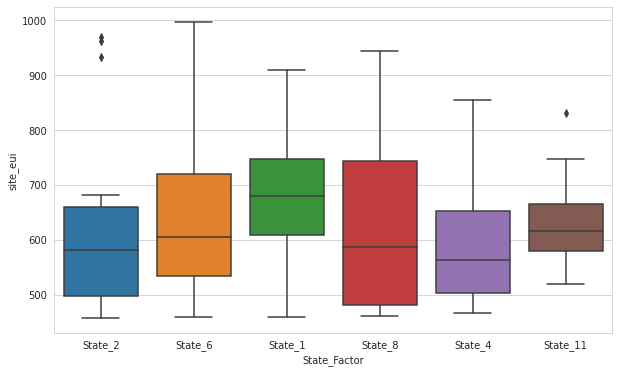

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="State_Factor",
            y="site_eui",
            data=df)
plt.show()

<a id="3"></a>
# **<center><span style="color:#00BFC4;"> Distribution of Site_eui between 1889 to 2015 </span></center>**

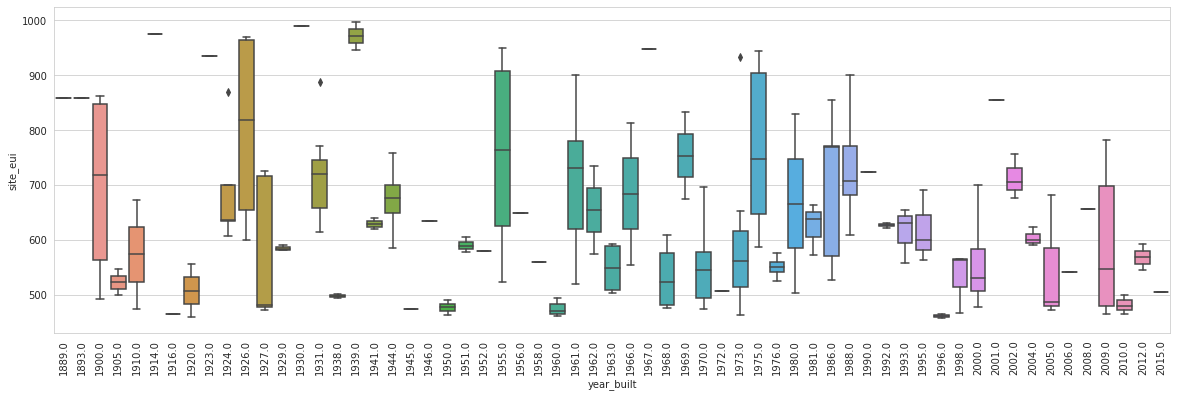

In [21]:
plt.figure(figsize=(20,6))
sns.boxplot(x="year_built",
            y="site_eui",
            data=df)
plt.xticks(rotation=90)
plt.show()

## Observations
- The floor area varies between 900 square feet to 63K square feet
- Floor area of 50K square feet and above tend to have high median site_eui

In [22]:
train['floor_area'].describe()

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

<a id="3"></a>
# **<center><span style="color:#00BFC4;">Correlation between Floor area and building class</span></center>**

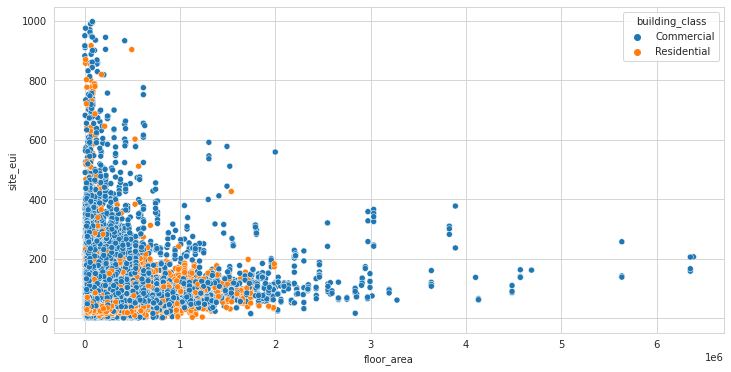

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=train,x='floor_area',hue='building_class',y='site_eui')
plt.show()

<a id="3"></a>
# **<center><span style="color:#00BFC4;"> Distribution of Floor_area wrt energy_star_rating on the basis of States</span></center>**

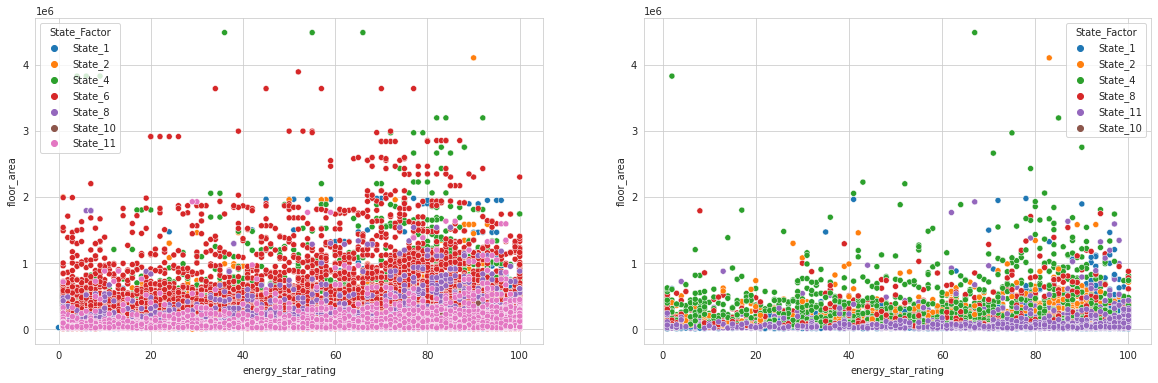

In [24]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=train,y='floor_area',hue='State_Factor',x='energy_star_rating')

plt.subplot(1,2,2)
sns.scatterplot(data=test,y='floor_area',hue='State_Factor',x='energy_star_rating')
plt.show()

<a id="3"></a>
# **<center><span style="color:#00BFC4;"> Distribution of site_eui wrt ELEVATION</span></center>**

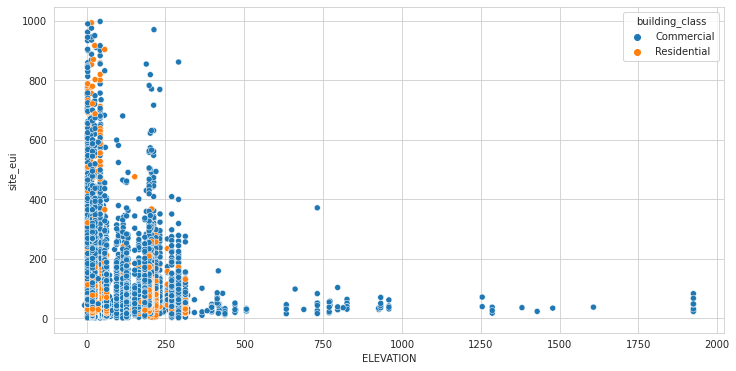

In [25]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=train, x="ELEVATION", y="site_eui",hue='building_class')
plt.show()